In [1]:
import pandas as pd
import os
import shutil

In [2]:
# Dump all images into a folder and specify the path:
data_dir = os.getcwd() + "/data/all_images/"

# Path to destination directory where we want subfolders
dest_dir = os.getcwd() + "/data/reorganized/"

In [4]:
# Read the csv file containing image names and corresponding labels
skin_df = pd.read_csv('data/HAM10000/HAM10000_metadata.csv')
skin_df2 = pd.read_csv('data/HAM10000/HAM10000_metadata.csv')
print(skin_df['dx'].value_counts())

label=skin_df2['dx'].unique().tolist()  #Extract labels into a list
label_images = []

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [9]:
# Copy images to new folders
os.mkdir(dest_dir + "/")
for i in label:
    os.mkdir(dest_dir + str(i) + "/")
    sample = skin_df2[skin_df2['dx'] == i]['image_id']
    label_images.extend(sample)
    for id in label_images:
        shutil.copyfile((data_dir + "/"+ id +".jpg"), (dest_dir + i + "/"+id+".jpg"))
    label_images=[]   

In [13]:
from keras.preprocessing.image import ImageDataGenerator
import os
from matplotlib import pyplot as plt

In [14]:
# define training directory that contains subfolders
train_dir = os.getcwd() + "/data/reorganized/"
#USe flow_from_directory
train_data_keras = datagen.flow_from_directory(directory=train_dir,
                                         class_mode='categorical',
                                         batch_size=16,  #16 images at a time
                                         target_size=(32,32))  #Resize images

Found 10015 images belonging to 7 classes.


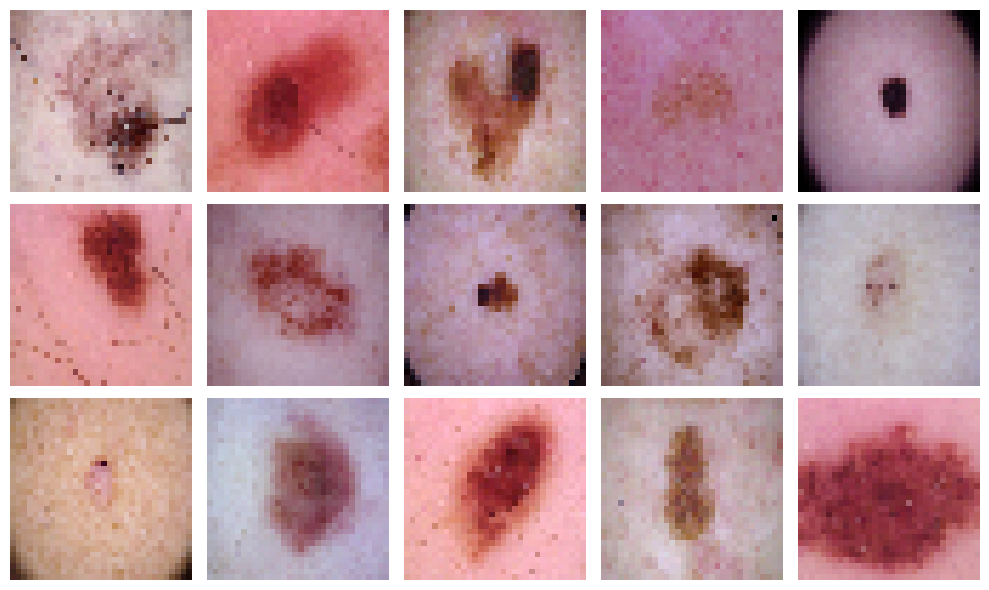

In [15]:
#We can check images for a single batch.
x, y = next(train_data_keras)


# View each image
num_images = 15
rows = 3
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(10, 6))
for i in range(num_images):
    row = i // cols
    col = i % cols
    
    image = x[i].astype(int)
    
    axes[row, col].imshow(image)
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()